In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score

import warnings
warnings.filterwarnings('ignore')

# PART A

#  1. Data Understanding & Exploration: [5 Marks]
#     A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]
#     B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]
#     C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]
#     D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [2]:
# A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
churn1.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [4]:
#  B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

churn2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
churn2.head()


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn1.shape

(7043, 10)

In [6]:
churn2.shape

(7043, 12)

In [7]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [8]:
churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [9]:
# C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

MergeChrurns =  pd.merge(churn1,churn2, on='customerID', how='outer')


In [10]:
MergeChrurns.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
MergeChrurns.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
MergeChrurns.shape

(7043, 21)

In [13]:
MergeChrurns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

col1 = churn1.columns
col2 = churn2.columns
col3 = MergeChrurns.columns

In [15]:
# Prinitng columns of churn1 , churn2 and MergeResult 

col1

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [16]:
col2

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
col3

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
# changing index to str datatype

col1.values.astype(str)

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'], dtype='<U15')

In [19]:
col2.values.astype(str)

array(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='<U16')

In [20]:
col3.values.astype(str)

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype='<U16')

In [21]:
# Now appending result of col1 to col2 

col4 = col1.union(col2)

In [22]:
# Printing col4 col1(churn1) + col2(churn2)

col4

Index(['Churn', 'Contract', 'Dependents', 'DeviceProtection',
       'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup',
       'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod',
       'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV',
       'TechSupport', 'TotalCharges', 'customerID', 'gender', 'tenure'],
      dtype='object')

In [23]:
# Checking result of merger which is col3 and col4 are equal or not by comparision operator
#

set(col3).intersection(set(col4))


{'Churn',
 'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MonthlyCharges',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'customerID',
 'gender',
 'tenure'}

In [24]:
col3.values == col4.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

From our comparision operator we have merged 2 dataframes correctly . Result of col3 == col4 shows that only one column customerId is common in between them hence result of comparision is only true once. Even we have checked intersection of col3 and col4. And it returns all columns are common in between both. hence, our merge of two dataframes churn1 and churn2 are correct. 

# Question 2. Data Cleaning & Analysis: [5 Marks]
#    A. Impute missing/unexpected values in the DataFrame. [2 Marks]
#    B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
#         [For Example: MonthlyCharges, TotalCharges]
#    C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
#         distribution in the pie-chart. [4 Marks]
#    D. Share insights for Q2.c. [2 Marks]
#    E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]
#    F. Split the data into 80% train and 20% test. [1 Marks]
#    G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [25]:
# A. i) Impute missing values in the DataFrame. [2 Marks]¶

MergeChrurns.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Fortunatly, from above output there is no any missing value in our newly merged dataframe. So, we don't need to remove missing values.Now, we need to check whether there are some unexpected values for cateogrial columns.  

In [26]:
# A) ii) unexpected values of data frame 
MergeChrurns['customerID'].unique()


array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [27]:
MergeChrurns.describe(include='all').loc['unique', :]

customerID          7043
gender                 2
SeniorCitizen        NaN
Partner                2
Dependents             2
tenure               NaN
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       NaN
TotalCharges        6532
Churn                  2
Name: unique, dtype: object

In [28]:
summary = MergeChrurns.describe().T
summary.loc[:, 'min':'max'] 

,min,25%,50%,75%,max
SeniorCitizen,0.00,0.0,0.00,0.00,1.00
tenure,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,18.25,35.5,70.35,89.85,118.75


Distribution of Numerical Attributes of newly merged dataframe

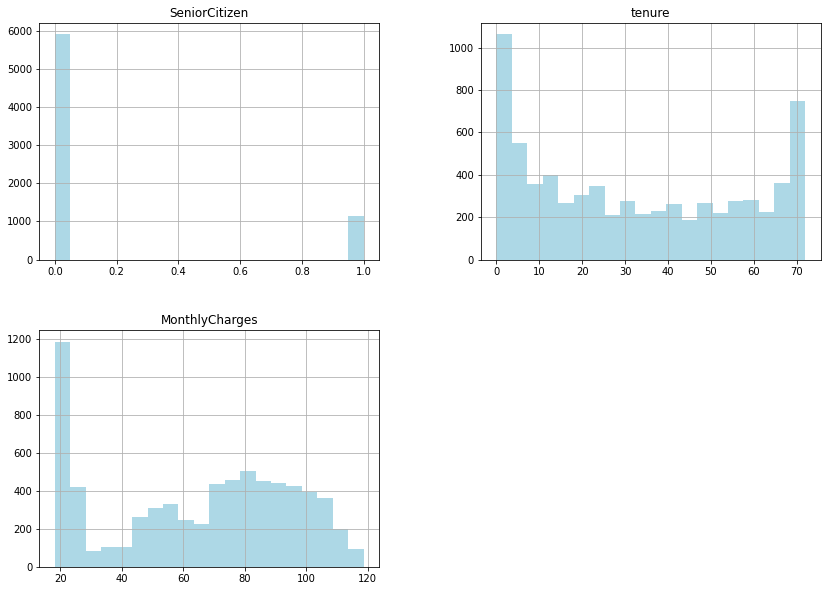

In [29]:
MergeChrurns.hist(bins = 20, figsize = (14, 10), color = 'lightblue')
plt.show()

In [30]:
# B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]¶
#     [For Example: MonthlyCharges, TotalCharges]

MergeChrurns.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Monthly charges column is alredy of float datatype so now converting TotalCharges to float

In [31]:
# DRoping duplicates 

MergeChrurns=MergeChrurns.drop_duplicates()


In [32]:
# Checking of null values
MergeChrurns.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:

MergeChrurns["TotalCharges"]=MergeChrurns["TotalCharges"].fillna(0)

In [34]:
MergeChrurns["TotalCharges"] = MergeChrurns["TotalCharges"].astype('category')
MergeChrurns.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges        category
Churn                 object
dtype: object

In [35]:

MergeChrurns['TotalCharges'] = pd.to_numeric(MergeChrurns['TotalCharges'],errors = 'coerce')
MergeChrurns.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now, as expected MonthlyCharges and TotalCharges both columns are now of Float Datatype. 

In [36]:
# C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
#     distribution in the pie-chart. [4 Marks]

MergeChrurnsPie = MergeChrurns.select_dtypes(include=['object']).copy()

In [37]:
MergeChrurnsPie.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [38]:
MergeChrurnsPie.dtypes

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [39]:
print(MergeChrurnsPie.isnull().values.sum())

0


In [40]:
print(MergeChrurnsPie['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [41]:
print(MergeChrurnsPie['Churn'].value_counts().count())

2


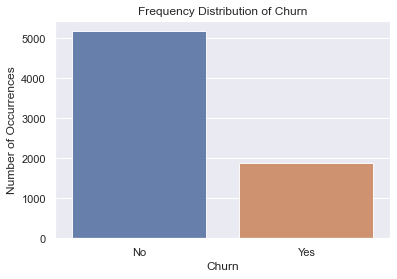

In [42]:
churn_count = MergeChrurnsPie['Churn'].value_counts()
sns.set(style="darkgrid")
sns.barplot(churn_count.index, churn_count.values, alpha=0.9)
plt.title('Frequency Distribution of Churn')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Churn', fontsize=12)
plt.show()

In [43]:
def pieDraw(df):
    labels = df.astype('category').cat.categories.tolist()
    counts = df.value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is to show the % on plot
    ax1.axis('equal')
    plt.show()

Frequency Distribution of StreamingTV


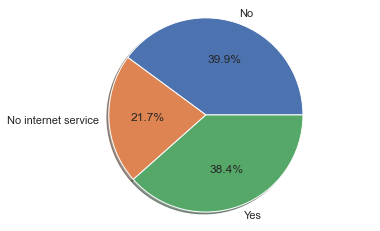

In [44]:
print('Frequency Distribution of StreamingTV')

pieDraw(MergeChrurnsPie['StreamingTV'])

Frequency Distribution of OnlineSecurity


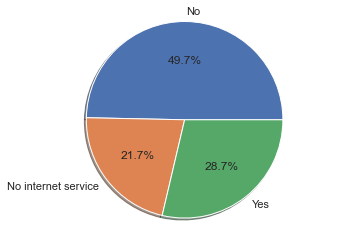

In [45]:
print('Frequency Distribution of OnlineSecurity')

pieDraw(MergeChrurnsPie['OnlineSecurity'])

Frequency Distribution of Churn


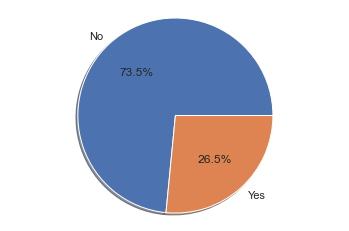

In [46]:
print('Frequency Distribution of Churn')

pieDraw(MergeChrurnsPie['Churn'])

Frequency Distribution of PhoneService


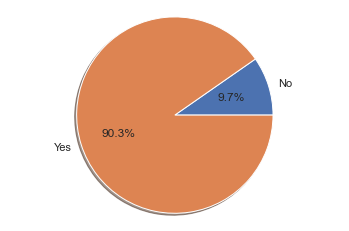

In [47]:
print('Frequency Distribution of PhoneService')


pieDraw(MergeChrurnsPie['PhoneService'])

Frequency Distribution of Dependents


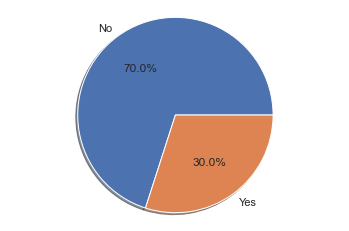

In [49]:
print('Frequency Distribution of Dependents')

pieDraw(MergeChrurnsPie['Dependents'])

# D. Share insights for Q2.c. [2 Marks]

i) From above pie chart we can conclude that just StreamingTV and OnlineSecurity has three categories that is yes , no and no internet service. 

ii) For the columns PhoneService is yes for 90% and just 10% people do not use PhoneService.

iii) Churn is No for 73% and Dependent is No for 70% means in these 2 columns has more number of people who are not depenent and nor Churn.



# E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]


There are two types of aproaches to encode categorical Features.
1) Find and Replace  
2) Label Encoding 
3) One Hot Encoding

2) Label Encoding :- To encode categorical values with a technique is called as "label encoding", which allows us to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1. We can do label encoding via attributes cat .

Before Encoding Data we should check null values and if null values exists we should fill it '0'

In [51]:
Encode_df = MergeChrurns.select_dtypes(include=['object']).copy()

In [52]:
Encode_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [53]:
Encode_df[Encode_df.isnull().any(axis=1)]

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn


From above query there are no any null values exists so we can prceed further to encode categorical data. 

In [54]:
Encode_df.dtypes

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

# 2) Label Encoding 

In [55]:
# First converting column to category 

Encode_df["PaperlessBilling"] = Encode_df["PaperlessBilling"].astype('category')
Encode_df.dtypes

customerID            object
gender                object
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling    category
PaymentMethod         object
Churn                 object
dtype: object

Then we can assign the encoded variable to a new column using the cat.codes accessor


In [56]:
Encode_df["PaperlessBilling_cat"] = Encode_df["PaperlessBilling"].cat.codes
Encode_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,PaperlessBilling_cat
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,1
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1


# 3) One Hot Encoding :

In [57]:

pd.get_dummies(Encode_df, columns=["OnlineBackup"]).head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,PaperlessBilling_cat,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,1,0,0,1
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,One year,No,Mailed check,No,0,1,0,0
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1,0,0,1
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0,1,0,0
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1,1,0,0


In [58]:
pd.get_dummies(Encode_df, columns=["DeviceProtection"]).head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,PaperlessBilling_cat,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,No,1,1,0,0
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,No,0,0,0,1
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,Yes,1,1,0,0
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),No,0,0,0,1
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1,1,0,0


From above command there are 3 columns gets created DeviceProtection_No ,DeviceProtection_Yes andDeviceProtection_NoInternet Service. 

Now encoding all other categorical features 

In [59]:
Encode_df.dtypes

customerID                object
gender                    object
Partner                   object
Dependents                object
PhoneService              object
MultipleLines             object
InternetService           object
OnlineSecurity            object
OnlineBackup              object
DeviceProtection          object
TechSupport               object
StreamingTV               object
StreamingMovies           object
Contract                  object
PaperlessBilling        category
PaymentMethod             object
Churn                     object
PaperlessBilling_cat        int8
dtype: object

In [60]:
Encode_df["customerID"] = Encode_df["customerID"].astype('category')
Encode_df["gender"] = Encode_df["gender"].astype('category')
Encode_df["Partner"] = Encode_df["Partner"].astype('category')
Encode_df["Dependents"] = Encode_df["Dependents"].astype('category')
Encode_df["PhoneService"] = Encode_df["PhoneService"].astype('category')
Encode_df["MultipleLines"] = Encode_df["MultipleLines"].astype('category')
Encode_df["InternetService"] = Encode_df["InternetService"].astype('category')
Encode_df["OnlineSecurity"] = Encode_df["OnlineSecurity"].astype('category')
Encode_df["OnlineBackup"] = Encode_df["OnlineBackup"].astype('category')
Encode_df["DeviceProtection"] = Encode_df["DeviceProtection"].astype('category')
Encode_df["TechSupport"] = Encode_df["TechSupport"].astype('category')
Encode_df["StreamingTV"] = Encode_df["StreamingTV"].astype('category')
Encode_df["StreamingMovies"] = Encode_df["StreamingMovies"].astype('category')
Encode_df["Contract"] = Encode_df["Contract"].astype('category')
Encode_df["PaymentMethod"] = Encode_df["PaymentMethod"].astype('category')
Encode_df["Churn"] = Encode_df["Churn"].astype('category')

In [61]:
Encode_df["customerID_cat"] = Encode_df["customerID"].cat.codes
Encode_df["gender_cat"] = Encode_df["gender"].cat.codes
Encode_df["Partner_cat"] = Encode_df["Partner"].cat.codes
Encode_df["Dependents_cat"] = Encode_df["Dependents"].cat.codes
Encode_df["PhoneService_cat"] = Encode_df["PhoneService"].cat.codes
Encode_df["MultipleLines_cat"] = Encode_df["MultipleLines"].cat.codes
Encode_df["InternetService_cat"] = Encode_df["InternetService"].cat.codes
Encode_df["OnlineSecurity_cat"] = Encode_df["OnlineSecurity"].cat.codes
Encode_df["OnlineBackup_cat"] = Encode_df["OnlineBackup"].cat.codes
Encode_df["DeviceProtection_cat"] = Encode_df["DeviceProtection"].cat.codes
Encode_df["TechSupport_cat"] = Encode_df["TechSupport"].cat.codes
Encode_df["StreamingTV_cat"] = Encode_df["StreamingTV"].cat.codes
Encode_df["StreamingMovies_cat"] = Encode_df["StreamingMovies"].cat.codes
Encode_df["Contract_cat"] = Encode_df["Contract"].cat.codes
Encode_df["PaymentMethod_cat"] = Encode_df["PaymentMethod"].cat.codes
Encode_df["Churn_cat"] = Encode_df["Churn"].cat.codes


In [62]:
Encode_df.dtypes

customerID              category
gender                  category
Partner                 category
Dependents              category
PhoneService            category
MultipleLines           category
InternetService         category
OnlineSecurity          category
OnlineBackup            category
DeviceProtection        category
TechSupport             category
StreamingTV             category
StreamingMovies         category
Contract                category
PaperlessBilling        category
PaymentMethod           category
Churn                   category
PaperlessBilling_cat        int8
customerID_cat             int16
gender_cat                  int8
Partner_cat                 int8
Dependents_cat              int8
PhoneService_cat            int8
MultipleLines_cat           int8
InternetService_cat         int8
OnlineSecurity_cat          int8
OnlineBackup_cat            int8
DeviceProtection_cat        int8
TechSupport_cat             int8
StreamingTV_cat             int8
StreamingM

In [63]:
Encode_df.shape

(7043, 34)

In [64]:
Encode_df.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_cat,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,Contract_cat,PaymentMethod_cat,Churn_cat
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,...,0,0,2,0,0,0,0,0,2,0
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,...,0,2,0,2,0,0,0,1,3,0
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,...,0,2,2,0,0,0,0,0,3,1
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,...,0,2,0,2,2,0,0,1,0,0
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,...,1,0,0,0,0,0,0,0,2,1


In [65]:
# F. Split the data into 80% train and 20% test. [1 Marks]

# MergeChrurns.dtypes

#split_df = MergeChrurns.select_dtypes(include=['int']).copy()
#split_df.head()

In [66]:

X = MergeChrurns.drop('Churn',axis=1)
y = MergeChrurns['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 1)

In [67]:
# G. Normalize/Standardize the data with the best suitable approach. [2 Marks]


There are many techinques  to normalize data. 
1)  maximum absolute scaling
2)  min-max feature scaling
3)  z-score method
4)  robust scaling

Now we will use 1st method to normalize data and which is Maximum Absolute Scaling 

In [68]:
normalize_df = MergeChrurns.select_dtypes(exclude=['object']).copy()

In [69]:
normalize_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [70]:
# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
    
# call the maximum_absolute_scaling function
df_cars_scaled = maximum_absolute_scaling(normalize_df)

df_cars_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.013889,0.251368,0.003437
1,0.0,0.472222,0.479579,0.217564
2,0.0,0.027778,0.453474,0.012453
3,0.0,0.625000,0.356211,0.211951
4,0.0,0.027778,0.595368,0.017462
...,...,...,...,...
7038,0.0,0.333333,0.714105,0.229194
7039,0.0,1.000000,0.869053,0.847792
7040,0.0,0.152778,0.249263,0.039892
7041,1.0,0.055556,0.626526,0.035303


# 3. Model building and Improvement: [10 Marks]
#    A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]#
#    B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]

In [71]:
# A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]

# XGBoost has the tendency to fill in the missing values

import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error


In [72]:
MergeChrurns.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
MergeChrurns.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [74]:
MergeChrurns.shape

(7043, 21)

In [75]:
xgb_model = xgb.XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1, booster='gbtree', 
                                  metric='multi:softmax')

xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))


[00:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "metric", "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eta=0.1, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=8,
              metric='multi:softmax', min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              nrounds=1000, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1.1,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [76]:
y_pred = xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())


[00:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "metric", "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1061
         Yes       0.59      0.49      0.54       348

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [78]:
## B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]¶

#To improve performace we are tuning hyperparameters of XGBoost Algorithm

xgb_model1 = xgb.XGBClassifier(eta=0.1, nrounds=100, max_depth=18, colsample_bytree=0.5, scale_pos_weight=1.1, booster='gbtree', 
                                  metric='multi:softmax')

xgb_model1.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))

[00:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "metric", "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eta=0.1, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=18,
              metric='multi:softmax', min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              nrounds=100, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1.1,
              subsample=1, tree_method='exact', validate_parameters=1, ...)

In [79]:
y_pred1 = xgb_model1.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())

[00:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "metric", "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1061
         Yes       0.57      0.49      0.53       348

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.77      0.78      0.78      1409



 After tuning also we do not find more differenc in accuracy erlier nrounds=1000 , max_depth=8 and we set it to nrounds=100 and max_depth=18 but still do not see much differnce in performance. 

#    PART B

#  1. Build a simple ML pipeline which will accept a single ‘.csv’ file as input an    return a trained base model that can be used for predictions. You can use    Dataset from Part 1 (single/merged).

The datasets provided by Part 1 contains more categorical data. So as we have to build ML pipeline for this we need data which contains numeric data to calculate performance. If we drop the catogorical features then there as just 2 numeric columns so our model will not capture all information if we drop the categorical data. 
so instead we are using other dataset which is having more number of numeric data. This data set is provided by Great Learning itself for same Ensemble Techinque week 2 contents. Dataset used : pima-indians-diabetes.csv

In [81]:
pima_df = pd.read_csv('pima-indians-diabetes.csv')
pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
# Finding shape of dataframe 

pima_df.shape

(768, 9)

In [83]:
# Finding info of dataframe 

pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
# Finding 5 Table summary of dataframe

pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


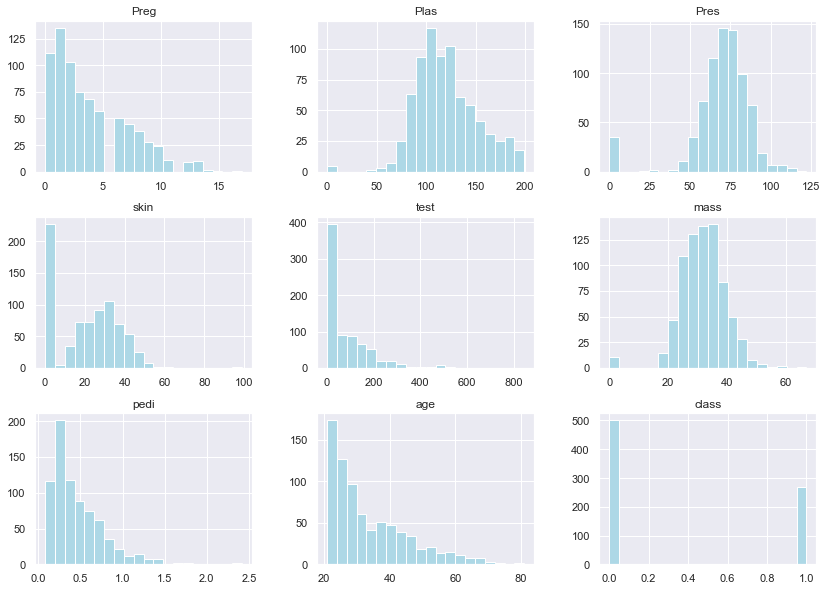

In [85]:
# Plotting histogram based on each column of dataframe

pima_df.hist(bins = 20, figsize = (14, 10), color = 'lightblue')
plt.show()

In [86]:
# datatypes of each column

pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [87]:
# Checking the null values of dataframe 

pima_df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [88]:
# Setting X and y values 

X = pima_df.drop(['class'],axis=1)
y = pima_df['class']

# 2. Create separate functions for various purposes.

In [89]:
# Defineing a separate funtion which calls each model as per it's types as lr, knn, nb, dt,svc etc.

def get_models():
    models = dict()
    models['lr'] = LogisticRegression(multi_class = 'multinomial') 
    models['knn'] = KNeighborsClassifier()
    models['nb'] = GaussianNB()
    models['dt'] = DecisionTreeClassifier()
    models['svc'] = SVC()
    return models

# 3. Various base models should be trained to select the best performing model.

In [90]:
# tuning of hyperparameters to train the model 

def evaluated_model(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=15,n_repeats=3, random_state=1)
    scores = cross_val_score(model,X,y,scoring= 'accuracy',cv = cv, n_jobs=1,verbose=0)
    return scores

# 4. Pickle file should be saved for the best performing model.
# Include best coding practices in the code:
#    • Modularization
#    • Maintainability
#    • Well commented code etc.

In [91]:
models = get_models()
models.items()

dict_items([('lr', LogisticRegression(multi_class='multinomial')), ('knn', KNeighborsClassifier()), ('nb', GaussianNB()), ('dt', DecisionTreeClassifier()), ('svc', SVC())])

In [92]:
# Global variable declaration of pipeline 

results , names = list(),list()

In [93]:
# After model evaluation append the score and name of model.

for name,model in models.items():
    scores = evaluated_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' %(name,np.mean(scores),np.std(scores)))

>lr 0.774 (0.060)
>knn 0.719 (0.060)
>nb 0.757 (0.070)
>dt 0.705 (0.066)
>svc 0.760 (0.054)


From above pipline we can conclude that we can increase the performance by increasing number of splits and we can decrease the performance by decreasing number of splits.For exa now for same dataframe I am setting n_splits = 5

# i) Tuning of Hyperparameters : n_split = 5 

In [94]:
def evaluated_model(model,X,y):
    cv1 = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=1)
    scores1 = cross_val_score(model,X,y,scoring= 'accuracy',cv = cv1, n_jobs=1,verbose=0)
    return scores1

In [95]:
models1 = get_models()
models1.items()

dict_items([('lr', LogisticRegression(multi_class='multinomial')), ('knn', KNeighborsClassifier()), ('nb', GaussianNB()), ('dt', DecisionTreeClassifier()), ('svc', SVC())])

In [96]:
# Global variable declaration of pipeline 

results1 , names1 = list(),list()

In [97]:
# After model evaluation append the score and name of model.

for name,model in models.items():
    scores1 = evaluated_model(model,X,y)
    results1.append(scores)
    names1.append(name)
    print('>%s %.3f (%.3f)' %(name,np.mean(scores1),np.std(scores1)))

>lr 0.773 (0.028)
>knn 0.717 (0.030)
>nb 0.756 (0.035)
>dt 0.692 (0.031)
>svc 0.757 (0.026)


See from above observation performance of model is decreased/ Earlier when n_spilts= 15 then performance for all models is between 60-70.  and now when we set n_splits=5 then performance is decreased and it is between 25 to 35 %.

#  ii)  We change n_repeats = 1 

In [98]:
def evaluated_model(model,X,y):
    cv2 = RepeatedStratifiedKFold(n_splits=15,n_repeats=1, random_state=1)
    scores2 = cross_val_score(model,X,y,scoring= 'accuracy',cv = cv2, n_jobs=1,verbose=0)
    return scores2

In [99]:
models2 = get_models()
models2.items()

dict_items([('lr', LogisticRegression(multi_class='multinomial')), ('knn', KNeighborsClassifier()), ('nb', GaussianNB()), ('dt', DecisionTreeClassifier()), ('svc', SVC())])

In [100]:
models2 = get_models()
models2.items()

dict_items([('lr', LogisticRegression(multi_class='multinomial')), ('knn', KNeighborsClassifier()), ('nb', GaussianNB()), ('dt', DecisionTreeClassifier()), ('svc', SVC())])

In [101]:
# Global variable declaration of pipeline 

results2 , names2 = list(),list()

In [102]:
# After model evaluation append the score and name of model.

for name,model in models.items():
    scores2 = evaluated_model(model,X,y)
    results2.append(scores2)
    names2.append(name)
    print('>%s %.3f (%.3f)' %(name,np.mean(scores2),np.std(scores2)))

>lr 0.776 (0.053)
>knn 0.723 (0.052)
>nb 0.755 (0.054)
>dt 0.738 (0.055)
>svc 0.759 (0.053)


Now, from above obseravations when we are decreasing n_Repeats then performance of model is incresing. Earlier we have set n_Repeats =3 and now we are setting it 1 then oour performance is also increasing. 

# iii) Stacking same .csv 

In [103]:
from sklearn.ensemble import StackingClassifier 

In [104]:
def get_stacking():
    level0 = list()
    level0.append(('lr',LogisticRegression()))
    level0.append(('knn',KNeighborsClassifier()))
    level0.append(('nb',GaussianNB()))
    level0.append(('svc',SVC()))
    level0.append(('dt',DecisionTreeClassifier()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators= level0,final_estimator=level1,cv=5)
    return model

In [105]:
# Defineing a separate funtion for stacking 

def get_models_stack():
    models = dict()
    models['lr'] = LogisticRegression(multi_class = 'multinomial') 
    models['knn'] = KNeighborsClassifier()
    models['nb'] = GaussianNB()
    models['dt'] = DecisionTreeClassifier()
    models['svc'] = SVC()
    models['stacking'] = get_stacking()
    return models

In [106]:
models = get_models_stack()
models.items()

dict_items([('lr', LogisticRegression(multi_class='multinomial')), ('knn', KNeighborsClassifier()), ('nb', GaussianNB()), ('dt', DecisionTreeClassifier()), ('svc', SVC()), ('stacking', StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('nb', GaussianNB()), ('svc', SVC()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression()))])

In [107]:
# After model evaluation append the score and name of model.

for name,model in models.items():
    scores = evaluated_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' %(name,np.mean(scores),np.std(scores)))

>lr 0.776 (0.053)
>knn 0.723 (0.052)
>nb 0.755 (0.054)
>dt 0.721 (0.059)
>svc 0.759 (0.053)
>stacking 0.770 (0.055)


from above observation we do not get much difference in performance after stacking 